# Capítulo 5. Máquinas de Soporte de Vectores


## <span style="color:green">1. Clasificación Lineal con SVM</span>

In [31]:
#Importar las librerias numpy, pandas, matplotlib 📚
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib import pyplot

Las máquinas de vectores de soporte depende de que los datos esten bien escalados 👀

In [32]:
#Importar los datos a necesitar, en este caso, sobre si fueron seleccionados o no para un trabajo. 
#La variable gmat tiene un rango de número más elevado en comparación a las otras variables
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
             'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
             'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
             'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
          }


In [33]:
#Visualiza los datos de trabajo
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [34]:
#Separar los datos a predictores y los predichos
x = df[['work_experience','gpa','gmat']]
y = df['admitted']

In [35]:
#Haz un pipeline para escalar los datos utilizando StandarScaler y un Kernel Lineal
svm = Pipeline([
    ("escalar", StandardScaler()),
    #Haz un SVC=Support Vector Classifier
    ("svc", SVC(kernel="linear", C=1))
])

In [36]:
#Ejecutar el pipeline
svm.fit(x,y)

Pipeline(steps=[('escalar', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [37]:
#Haz una predicción de un sujeto aleatorio para ver que todo marche bien 👍🏼
svm.predict([[5, 3.9, 720]])

/Users/karenrg/my_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [38]:
#Evaluar el clasificador  con una matriz de confusión 
from sklearn.metrics import confusion_matrix, f1_score
y_pred=svm.predict(x)
confusion_matrix(y_pred,y)
#En este caso no hay diferencia

array([[18,  1],
       [ 3, 18]])

In [39]:
#Sacar el f1_score 
f1_score(y_pred,y)

0.9

***

## <span style="color:green">2. Clasificador No Lineal con SVM</span>

#### <span style="color:blue"> 2.1 Kernel Polinomial</span>

In [40]:
#Importar make_moons 
from sklearn.datasets import make_moons
#Hacer un set de datos artificial con make_moons, genera un poco de ruido
X,y = make_moons(n_samples=100, noise=0.15)

In [41]:
#Visualizar x, y 👀
x
y

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

Aquí, todos tendremos datos diferentes. No se alteren si no les da lo mismo que a mi. 

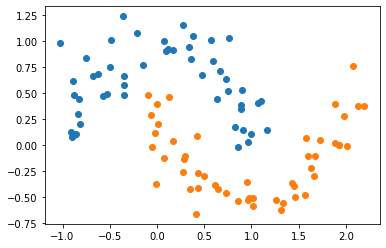

In [42]:
#Grafica el set de datos de make_moons
for class_value in range(2):
    row_ix = np.where(y == class_value)
    #Esto serán las coordenadas 
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

In [43]:
#Haz un pipeline donde aplicarás un kernel polinomial 
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svc", SVC(kernel="poly", C=5, degree=10, coef0=1))
])

Como es un kernel polinomial, tienes que especificar el grado del mismo. 

In [45]:
#Ejecutar el pipeline
svm.fit(X,y)

Pipeline(steps=[('escalar', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

In [46]:
#Predecir ahora con este pipeline para ver que todo marche bien
y_pred=svm.predict(X)

In [47]:
#Evaluar el clasificador con una matriz de confusión 
confusion_matrix(y_pred,y)

array([[50,  0],
       [ 0, 50]])

In [48]:
#Sacar el f1_score 
f1_score(y_pred,y)

1.0

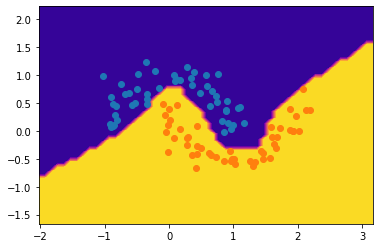

In [49]:
#Hacer la gráfica para visualizar el clasificador no lineal 
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
svm.fit(X,y)
yhat = svm.predict(grid)
zz = yhat.reshape(xx.shape)
pyplot.contourf(xx, yy, zz, cmap='plasma')
for class_value in range(2):
    row_ix = np.where(y == class_value)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
pyplot.show()

Ejercicio: Varía el grado en el polinomio para evaluar la gráfica que despliega acorde al clasificador 👀. 
Por ejemplo, grado 3.

***

#### <span style="color:blue"> 2.2 Kernel RBF Gaussiano</span>

In [51]:
#Hacer un pipeline con StandarScaler pero ahora con un Kernel RBF
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1, gamma=5))
])

gamma es un parámetro de regularización. **Sobreajuste**= Reducir gamma. **Subajuste**=Aumentar gamma

In [52]:
#Ejecutar el pipeline
svm.fit(X,y)

Pipeline(steps=[('escalar', StandardScaler()), ('svc', SVC(C=1, gamma=5))])

In [53]:
#Predecir ahora con este pipeline para ver que todo marche bien
y_pred=svm.predict(X)

In [54]:
#Evaluar el clasificador con una matriz de confusión 
confusion_matrix(y_pred,y)

array([[50,  0],
       [ 0, 50]])

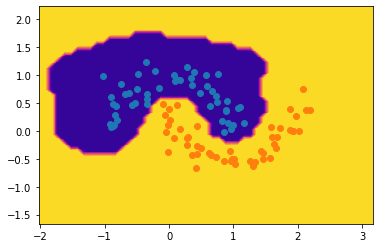

In [55]:
#Hacer la gráfica para visualizar el clasificador no lineal
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
svm.fit(X,y)
yhat = svm.predict(grid)
zz = yhat.reshape(xx.shape)
pyplot.contourf(xx, yy, zz, cmap='plasma')
for class_value in range(2):
    row_ix = np.where(y == class_value)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
pyplot.show()

Ejercicio: varía los hiperparametros, es decir **gamma y C**. 
Observa los resultados y analiza.

***

### <span style="color:green"> 3. Regresión con SVM</span>

#### <span style="color:blue"> 3.1 Regresión Lineal </span>

In [58]:
#Importar SVR= Supporr Vector Regressor  
from sklearn.svm import LinearSVR
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svr", LinearSVR(epsilon=1.5))
])

#### <span style="color:blue"> 3.2 Regresión Polinomial </span>

In [59]:
#Tambiém se puede hacer regresiones polinomiales
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svr", SVR(kernel="poly", degree=3,epsilon=1.5))
])